## Classification of Faces

In this excercise, we try to classify images of : "Miranda_Cosgrove" "Chris_Martin" "Emma_Stone" "Jamie_Foxx" "Steve_Jobs" "Zac_Efron" "Sandra_Oh" "Taryn_Manning".  data is from a random sample of 8 persons of the OXFORD VGG Face dataset, more information here: [http://www.robots.ox.ac.uk/~vgg/data/vgg_face/](http://www.robots.ox.ac.uk/~vgg/data/vgg_face/).

### Downloading of Data
You can download the data using the following code:

``` {python}
import gzip
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Downloading the data, if it does not exist, this will take some time... (>120MB)
import urllib
import os
if not os.path.isfile('8_faces_train_and_valid.hdf5'):
    urllib.request.urlretrieve("https://www.dropbox.com/s/dx03vk6dmbtoywn/8_faces_train_and_valid.hdf5?dl=1","8_faces_train_and_valid.hdf5")
!ls -l 8_faces_train_and_valid.hdf5
import h5py
h5f_X = h5py.File('8_faces_train_and_valid.hdf5', 'r')
print(list(h5f_X.keys()))
X_train = h5f_X['X_train_8_faces'].value
print(X_train.shape)
Y_train = h5f_X['Y_train_8_faces'].value
print(Y_train.shape)
X_valid = h5f_X['X_valid_8_faces'].value
print(X_valid.shape)
Y_valid = h5f_X['Y_valid_8_faces'].value
print(Y_valid.shape, X_valid.dtype)

n = 0 #Miranda Cosgrove
n = 1 #Chris Martin (singer)
n = 2 #Emma Stone (actress)
n = 3 #Jamie Foxx (actor)
n = 4 #Steve Jobs (entrepreneur)
n = 5 #Zac Efron (actor)
n = 6 #Sandra Oh (actress)
n = 7 #Taryn Manning (actress)
n = 4
idx=np.reshape(np.where(Y_train[0:len(Y_train)]==n),(250))
print(len(Y_train[idx]))
plt.imshow(np.asarray(X_train[idx][0],dtype="uint8"))

#Downloading the data, if it does not exist
if not os.path.isfile('8_faces_test.hdf5'):
  urllib.request.urlretrieve("https://www.dropbox.com/s/ugxrdo0lpc2ixvr/8_faces_test.hdf5?dl=1","8_faces_test.hdf5")
h5f_X = h5py.File('8_faces_test.hdf5', 'r')
print(list(h5f_X.keys()))
X_test = h5f_X['X_test_8_faces'].value
print(X_test.shape)
Y_test = h5f_X['Y_test_8_faces'].value
print(Y_test.shape)

np.min(X_train),np.max(X_train),np.min(X_test),np.max(X_test)
X_train /= 255
X_valid /= 255
X_test /= 255
```

In [1]:
from urllib import request

import h5py
import matplotlib.pyplot as plt
import numpy as np

In [2]:
DATA_LOADING = False

In [3]:
# Fetch Train, Val, Test Data from dropbox(?) link
if DATA_LOADING:
    request.urlretrieve("https://www.dropbox.com/s/dx03vk6dmbtoywn/8_faces_train_and_valid.hdf5?dl=1", "train_val.hdf5")
    request.urlretrieve("https://www.dropbox.com/s/ugxrdo0lpc2ixvr/8_faces_test.hdf5?dl=1", "test.hdf5")

In [4]:
with h5py.File("train_val.hdf5", "r") as file:
    x_train = file["X_train_8_faces"][()]
    y_train = file["Y_train_8_faces"][()]

    x_val = file["X_valid_8_faces"][()]
    y_val = file["Y_valid_8_faces"][()]

In [5]:
with h5py.File("test.hdf5") as file:
    x_test = file["X_test_8_faces"][()]
    y_test = file["Y_test_8_faces"][()]

In [6]:
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

In [7]:
labels = ["Miranda Cosgrove", "Chris Martin", "Emma Stone", "Jamie Fox", "Steve Jobs", "Zac Effron", "Sandra Oh",
          "Taryn Manning"]

### a.) Training an CNN from scratch
Train a model (as shown below) from scratch, using the training data for training and the validation data for validation. For all activations in the hidden layer use the 'ReLU', for the last layer use softmax. Use 3x3 convolutions and use padding = same.

- Plot the learning curves: (epochs vs training loss and validation loss) and epochs vs accuracy.
- Calculate the accuracy on the test set (you should reach an accuracy of about 0.54)
- Calculate the confusion matrix
- Have a look at missclassified examples

Image of the network: https://github.com/ioskn/mldl_htwg/blob/master/uebungen/dl_cnn_faces_net.png

In [8]:
from tensorflow import keras

model = keras.Sequential(
    [keras.layers.Input((48, 48, 3,)),
     keras.layers.Conv2D(filters=15, kernel_size=(3, 3), padding="same", activation="relu", name="convolution_1"),
     keras.layers.Conv2D(filters=15, kernel_size=(3, 3), padding="same", activation="relu", name="convolution_2"),
     keras.layers.MaxPool2D(strides=(2, 2), padding="same", name="maxpooling_1"),
     keras.layers.Conv2D(filters=30, kernel_size=(3, 3), padding="same", activation="relu", name="convolution_3"),
     keras.layers.Conv2D(filters=30, kernel_size=(3, 3), padding="same", activation="relu", name="convolution_4"),
     keras.layers.MaxPool2D(strides=(4, 4), padding="same", name="maxpooling_2"),
     keras.layers.Flatten(),
     keras.layers.Dense(300, activation="relu", name="fully_connected_layer_1"),
     keras.layers.Dropout(0.5, name="dropout"),
     keras.layers.Dense(8, activation="softmax")
     ]
)

model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 convolution_1 (Conv2D)      (None, 48, 48, 15)        420       
                                                                 
 convolution_2 (Conv2D)      (None, 48, 48, 15)        2040      
                                                                 
 maxpooling_1 (MaxPooling2D)  (None, 24, 24, 15)       0         
                                                                 
 convolution_3 (Conv2D)      (None, 24, 24, 30)        4080      
                                                                 
 convolution_4 (Conv2D)      (None, 24, 24, 30)        8130      
                                                                 
 maxpooling_2 (MaxPooling2D)  (None, 6, 6, 30)         0         
                                                                 
 flatten (Flatten)           (None, 1080)              0

In [9]:
model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_val, y_val),
          callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/100
32/32 [==============================] - 9s 77ms/step - loss: 2.0185 - accuracy: 0.1975 - val_loss: 1.8470 - val_accuracy: 0.3575
Epoch 2/100
32/32 [==============================] - 1s 44ms/step - loss: 1.7710 - accuracy: 0.3380 - val_loss: 1.6628 - val_accuracy: 0.3900
Epoch 3/100
32/32 [==============================] - 1s 44ms/step - loss: 1.5709 - accuracy: 0.4250 - val_loss: 1.5102 - val_accuracy: 0.4575
Epoch 4/100
32/32 [==============================] - 1s 44ms/step - loss: 1.3556 - accuracy: 0.5225 - val_loss: 1.4381 - val_accuracy: 0.4875
Epoch 5/100
32/32 [==============================] - 1s 44ms/step - loss: 1.2334 - accuracy: 0.5670 - val_loss: 1.2892 - val_accuracy: 0.5550
Epoch 6/100
32/32 [==============================] - 1s 45ms/step - loss: 1.0551 - accuracy: 0.6375 - val_loss: 1.2414 - val_accuracy: 0.5700
Epoch 7/100
32/32 [==============================] - 1s 45ms/step - loss: 0.9204 - accuracy: 0.6785 - val_loss: 1.1953 - val_accuracy: 0.5925
Epoch 

Schon im Overfitting?

In [10]:
history = model.history.history

In [18]:
import seaborn as sns

def create_loss_acc_curves(hist):

    fig, axs = plt.subplots(1, 2)

    sns.lineplot(data=hist, x=range(len(hist["loss"])), y="loss", label="Training Loss", ax=axs[0])
    sns.lineplot(data=hist, x=range(len(hist["loss"])), y="val_loss", label="Validation Loss", ax=axs[0])
    axs[0].legend()
    axs[0].set_title("Loss Curves")

    sns.lineplot(data=hist, x=range(len(hist["loss"])), y="accuracy", label="Training Accuracy", ax=axs[1])
    sns.lineplot(data=hist, x=range(len(hist["loss"])), y="val_accuracy", label="Validation Accuracy", ax=axs[1])
    axs[1].legend()
    axs[1].set_title("Accuracy Curves")

    plt.show()


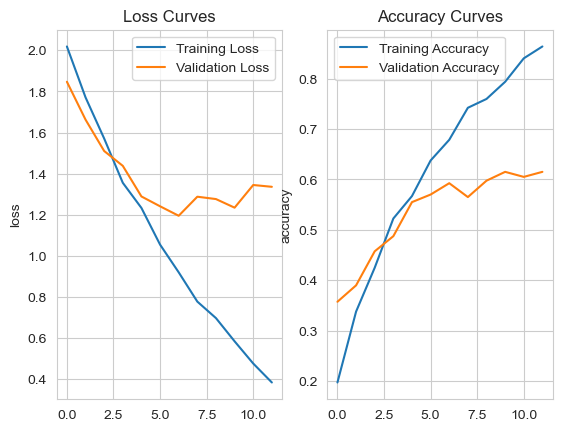

In [19]:
create_loss_acc_curves(history)

In [12]:
# Test Accuracy
from sklearn.metrics import accuracy_score

y_hat = np.argmax(model.predict(x_test), axis=1)

accuracy_score(y_test, y_hat)

13/13 [==============================] - 1s 9ms/step


0.6175

In [13]:
from sklearn.metrics import confusion_matrix

def show_confusion_matrix(y_true, y_hat):
    confusion = confusion_matrix(y_true, y_hat)
    confusion_norm = confusion / np.sum(confusion, axis=1)

    ax = sns.heatmap(confusion_norm, xticklabels=labels, yticklabels=labels, cmap="Blues", annot=True, fmt = ".4f", square=True)
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")


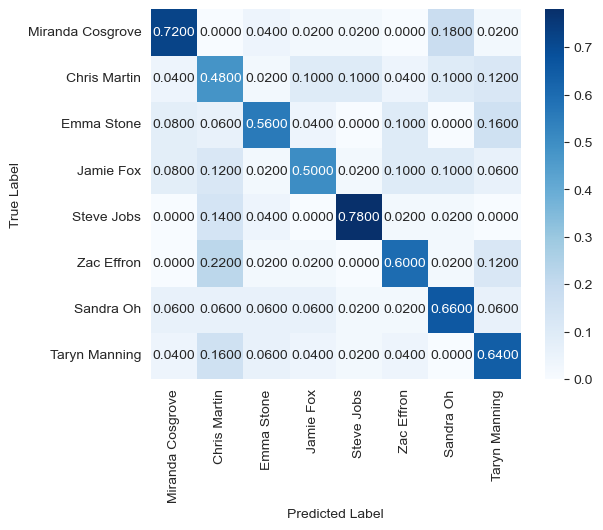

In [14]:
show_confusion_matrix(y_test, y_hat);

In [15]:
def show_incorrect_examples(y_true, y_hat, x):
    incorrect_predictions_x = x[y_hat != y_true]
    incorrect_predictions_y_true = y_test[y_hat != y_true]
    incorrect_predictions_y_hat = y_hat[y_hat != y_true]
    fig, axs = plt.subplots(4, 3)
    fig.set_size_inches((7, 7))
    for idx, ax in enumerate(axs.flatten()):
        ax.imshow(incorrect_predictions_x[idx, :, :, :])
        ax.set_title(
            f"Predicted Person: {labels[incorrect_predictions_y_hat[idx]]}\n Actual Person: {labels[incorrect_predictions_y_true[idx]]}",
            fontdict={"fontsize": 8})
        ax.axis("off")

    fig.suptitle("Examples for incorrect classified images")
    fig.tight_layout()


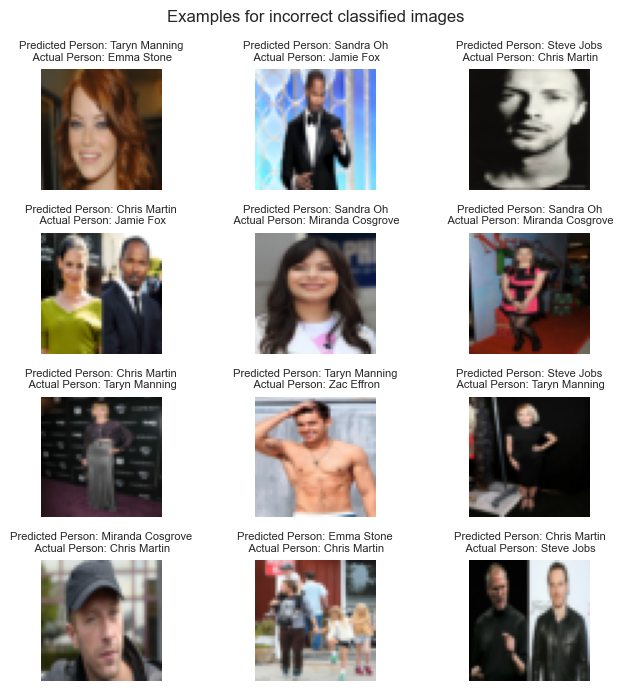

In [16]:
show_incorrect_examples(y_test, y_hat, x_test)

### b.) Training using transfer learning
In transfer learning you use an existing trained model with given weights trained on a different task. You then add a few layers yourself and only train them. The model you add should look like:

my_dense1 (Dense)            (None, 512)               262656
_________________________________________________________________
my_dense2 (Dense)            (None, 512)               262656
_________________________________________________________________
my_dense3 (Dense)            (None, 100)               51300
_________________________________________________________________
my_dense4 (Dense)            (None, 8)                 808

Use the following code as a starting point:

In [20]:
img_height = img_width = 48
base_model = keras.applications.VGG16(weights="imagenet", include_top=False, input_shape=(img_width, img_height, 3))

In [25]:
fc1 = base_model.output
fc1 = keras.layers.Flatten()(fc1)
fc1 = keras.layers.Dense(512, activation="relu", name="my_dense1")(fc1)
fc1 = keras.layers.Dense(512, activation="relu", name="my_dense2")(fc1)
fc1 = keras.layers.Dense(100, activation="relu", name="my_dense3")(fc1)
fc1 = keras.layers.Dense(8, activation="softmax", name="my_dense4")(fc1)

transfer_model = keras.Model(base_model.input, fc1)
transfer_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0   

In [26]:
for layer in transfer_model.layers:
    name = layer.name
    if name.startswith("my"):
        layer.trainable = True
        print(name)
    else:
        layer.trainable = False

my_dense1
my_dense2
my_dense3
my_dense4


In [27]:
transfer_model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.SparseCategoricalCrossentropy(),
                       metrics=["accuracy"])

In [28]:
transfer_model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_val, y_val),
                   callbacks=keras.callbacks.EarlyStopping(patience=5))

Epoch 1/100
32/32 [==============================] - 10s 248ms/step - loss: 1.7797 - accuracy: 0.3445 - val_loss: 1.5050 - val_accuracy: 0.4625
Epoch 2/100
32/32 [==============================] - 5s 152ms/step - loss: 1.3677 - accuracy: 0.5045 - val_loss: 1.3308 - val_accuracy: 0.5425
Epoch 3/100
32/32 [==============================] - 5s 152ms/step - loss: 1.1128 - accuracy: 0.5965 - val_loss: 1.4259 - val_accuracy: 0.4825
Epoch 4/100
32/32 [==============================] - 5s 150ms/step - loss: 0.9270 - accuracy: 0.6825 - val_loss: 1.4486 - val_accuracy: 0.4775
Epoch 5/100
32/32 [==============================] - 5s 152ms/step - loss: 0.8015 - accuracy: 0.7140 - val_loss: 1.4144 - val_accuracy: 0.5225
Epoch 6/100
32/32 [==============================] - 5s 151ms/step - loss: 0.6588 - accuracy: 0.7790 - val_loss: 1.3619 - val_accuracy: 0.5725
Epoch 7/100
32/32 [==============================] - 5s 151ms/step - loss: 0.4886 - accuracy: 0.8470 - val_loss: 1.3998 - val_accuracy: 0.572

In [29]:
transfer_history = transfer_model.history.history

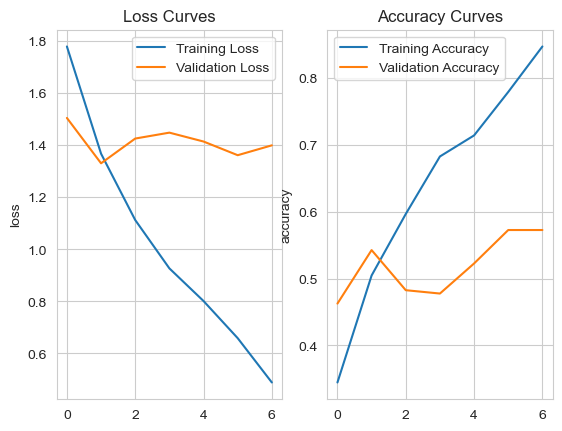

In [30]:
create_loss_acc_curves(transfer_history)

In [31]:
y_hat = np.argmax(transfer_model.predict(x_test), axis=1)

accuracy_score(y_test, y_hat)

13/13 [==============================] - 4s 83ms/step


0.6

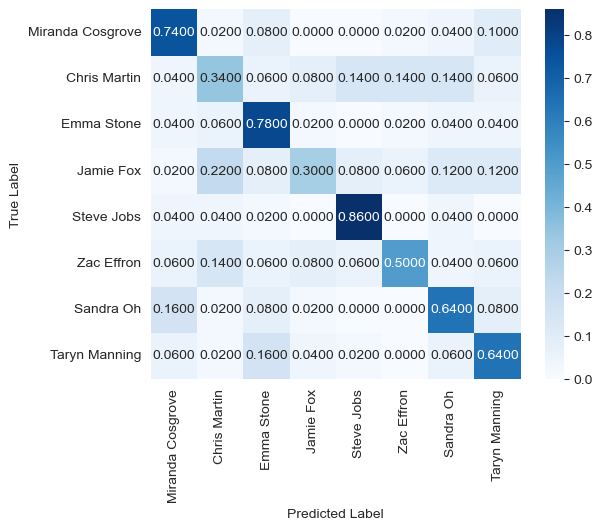

In [32]:
show_confusion_matrix(y_test, y_hat)

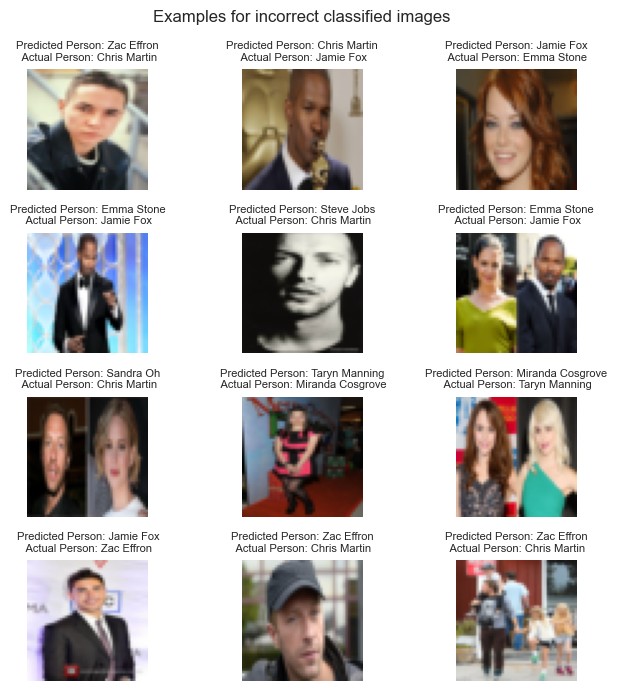

In [33]:
show_incorrect_examples(y_test, y_hat, x_test)

### c.) Try to get better
Ideas: use dropout and other tricks to prevent overfitting. Try to learn some convulutional layers as well.

In [95]:
base_model = keras.applications.VGG16(weights="imagenet", include_top=False, input_shape=(img_width, img_height, 3))

fc1 = base_model.output
fc1 = keras.layers.Flatten()(fc1)
fc1 = keras.layers.Dense(512, activation="relu", kernel_regularizer="l2", name="my_dense1")(fc1)
fc1 = keras.layers.Dropout(0.5, name="my_dropout1") (fc1)
fc1 = keras.layers.Dense(256, activation="relu", kernel_regularizer="l2", name="my_dense2")(fc1)
fc1 = keras.layers.Dropout(0.5, name="my_dropout2") (fc1)
fc1 = keras.layers.Dense(128, activation="relu",  name="my_dense3") (fc1)
fc1 = keras.layers.Dropout(0.5, name="my_dropout3") (fc1)
fc1 = keras.layers.Dense(64, activation="relu", kernel_regularizer="l2", name="my_dense4")(fc1)
fc1 = keras.layers.Dense(8, activation="softmax", kernel_regularizer="l2", name="my_dense5")(fc1)

transfer_model_improved = keras.Model(base_model.input, fc1)

In [96]:
for layer in transfer_model_improved.layers:
    name = layer.name
    if name.startswith("my"):
        layer.trainable = True
        print(name)
    else:
        layer.trainable = False

my_dense1
my_dropout1
my_dense2
my_dropout2
my_dense3
my_dropout3
my_dense4
my_dense5


In [97]:
transfer_model_improved.compile(optimizer=keras.optimizers.RMSprop(),loss=keras.losses.SparseCategoricalCrossentropy(),
                       metrics=["accuracy"])

In [98]:
transfer_model_improved.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_val, y_val),
                   callbacks=[keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True), keras.callbacks.LearningRateScheduler(lambda epoch, lr: lr * 1 / (1 + 0.005 * epoch))])

Epoch 1/100
32/32 [==============================] - 11s 254ms/step - loss: 8.1661 - accuracy: 0.1450 - val_loss: 5.9659 - val_accuracy: 0.2075 - lr: 0.0010
Epoch 2/100
32/32 [==============================] - 5s 161ms/step - loss: 4.9289 - accuracy: 0.1705 - val_loss: 3.9823 - val_accuracy: 0.2450 - lr: 9.9502e-04
Epoch 3/100
32/32 [==============================] - 5s 160ms/step - loss: 3.5543 - accuracy: 0.2300 - val_loss: 3.1364 - val_accuracy: 0.2550 - lr: 9.8517e-04
Epoch 4/100
32/32 [==============================] - 5s 159ms/step - loss: 2.9597 - accuracy: 0.2565 - val_loss: 2.6576 - val_accuracy: 0.3400 - lr: 9.7061e-04
Epoch 5/100
32/32 [==============================] - 5s 161ms/step - loss: 2.6404 - accuracy: 0.2935 - val_loss: 2.4773 - val_accuracy: 0.3050 - lr: 9.5158e-04
Epoch 6/100
32/32 [==============================] - 5s 155ms/step - loss: 2.4124 - accuracy: 0.3325 - val_loss: 2.4961 - val_accuracy: 0.2650 - lr: 9.2837e-04
Epoch 7/100
32/32 [========================

In [99]:
transfer_history = transfer_model_improved.history.history

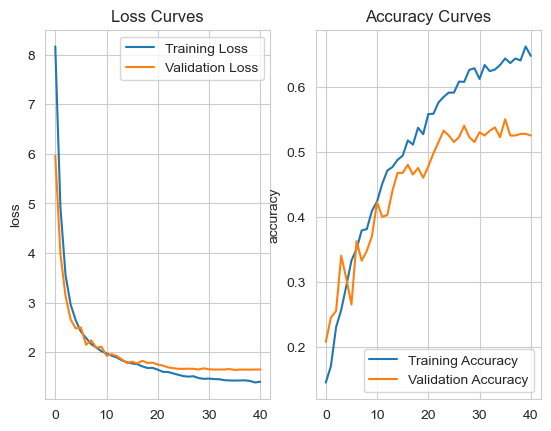

In [100]:
create_loss_acc_curves(transfer_history)

In [101]:
y_hat = np.argmax(transfer_model_improved.predict(x_test), axis=1)

accuracy_score(y_test, y_hat)

13/13 [==============================] - 2s 103ms/step


0.55

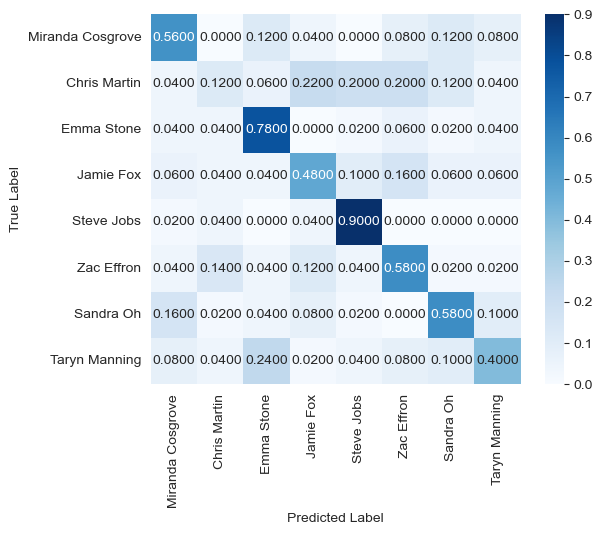

In [102]:
show_confusion_matrix(y_test, y_hat)

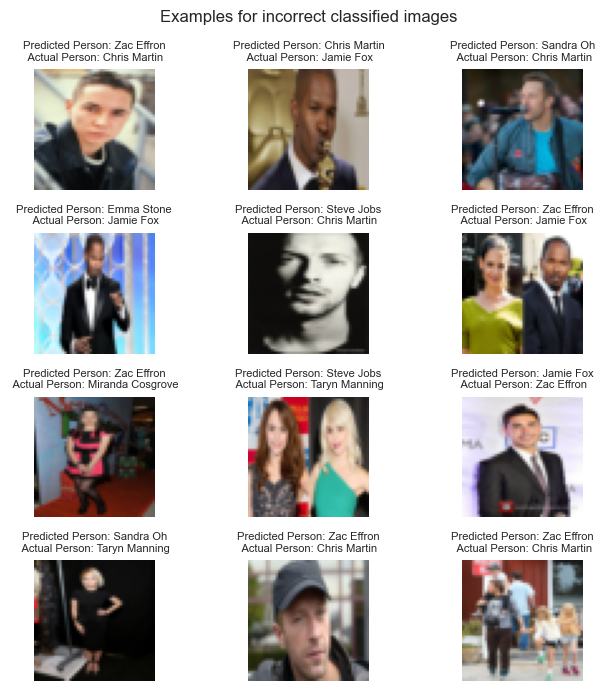

In [61]:
show_incorrect_examples(y_test, y_hat, x_test)